# Data Mining Twitter

In [1]:
import twitter
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

In [22]:
# Twitter authentification
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

twitter_api

In [3]:
# The Yahoo! Where On Earth ID for the entire world is 1, and for the USA is 23424977

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)


[{'trends': [{'name': '#OTGala12', 'tweet_volume': 132551, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23OTGala12', 'query': '%23OTGala12'}, {'name': '#isola', 'tweet_volume': 72468, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23isola', 'query': '%23isola'}, {'name': '#بن_شرقي_هلالي', 'tweet_volume': 69384, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A', 'query': '%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A'}, {'name': 'Swansea', 'tweet_volume': 91259, 'promoted_content': None, 'url': 'http://twitter.com/search?q=Swansea', 'query': 'Swansea'}, {'name': 'Jason Kidd', 'tweet_volume': 35435, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%22Jason+Kidd%22', 'query': '%22Jason+Kidd%22'}, {'name': '#PremiosFeroz', 'tweet_volume': None, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23PremiosFeroz', 'query': '%

In [4]:
print(world_trends[0]['trends'][:3])

[{'name': '#OTGala12', 'tweet_volume': 132551, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23OTGala12', 'query': '%23OTGala12'}, {'name': '#isola', 'tweet_volume': 72468, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23isola', 'query': '%23isola'}, {'name': '#بن_شرقي_هلالي', 'tweet_volume': 69384, 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A', 'query': '%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A'}]


In [5]:
# make it more readable
print(json.dumps(world_trends[0]['trends'][:3],indent=1))

[
 {
  "name": "#OTGala12",
  "tweet_volume": 132551,
  "promoted_content": null,
  "url": "http://twitter.com/search?q=%23OTGala12",
  "query": "%23OTGala12"
 },
 {
  "name": "#isola",
  "tweet_volume": 72468,
  "promoted_content": null,
  "url": "http://twitter.com/search?q=%23isola",
  "query": "%23isola"
 },
 {
  "name": "#\u0628\u0646_\u0634\u0631\u0642\u064a_\u0647\u0644\u0627\u0644\u064a",
  "tweet_volume": 69384,
  "promoted_content": null,
  "url": "http://twitter.com/search?q=%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A",
  "query": "%23%D8%A8%D9%86_%D8%B4%D8%B1%D9%82%D9%8A_%D9%87%D9%84%D8%A7%D9%84%D9%8A"
 }
]


In [6]:
# Get unique trends for the world and the US
world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name'] for trend in us_trends[0]['trends']])

In [7]:
# Look for the intersection of trends between the world and the US
common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#OTGala12', '#Alexis7', 'Jason Kidd', 'Rupert Murdoch', 'Swansea', '#ReasonsToStayInside', '#RiseUp4Roe'}


In [8]:
from urllib.parse import unquote

In [9]:
q = '#Datascience'
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except:
        break
    kwargs = dict([kv.split('=') for kv in unquote(next_results[1:])])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

print(json.dumps(statuses[0], indent=1))

Length of statuses 67
{
 "created_at": "Mon Jan 22 22:33:19 +0000 2018",
 "in_reply_to_user_id_str": null,
 "in_reply_to_status_id": null,
 "retweeted_status": {
  "created_at": "Mon Jan 22 19:03:49 +0000 2018",
  "in_reply_to_user_id_str": null,
  "possibly_sensitive": false,
  "in_reply_to_status_id": null,
  "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",
  "contributors": null,
  "coordinates": null,
  "id_str": "955516368849457154",
  "is_quote_status": false,
  "favorite_count": 61,
  "retweet_count": 30,
  "in_reply_to_user_id": null,
  "retweeted": false,
  "truncated": true,
  "id": 955516368849457154,
  "in_reply_to_status_id_str": null,
  "in_reply_to_screen_name": null,
  "text": "Putting #BigData #Analytics all together -- #DataScience deconstructed and reconstructed into one business process:\u2026 https://t.co/Ap2Gdo7hF4",
  "place": null,
  "geo": null,
  "user": {
   "created_at": "Fri Mar 23 16:35:17 +0000 2012",
   "profile_sidebar

In [10]:
# creates lists for : text of the status, screen name, hashtag, tweet length, and words
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name'] for status in statuses for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses for hashtag in status['entities']['hashtags']]

tweet_length = [len(w) for t in status_texts for w in t.split(',')]

words = [w for t in status_texts for w in t.split()]

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(tweet_length[0:5], indent=1))



[
 "RT @KirkDBorne: Putting #BigData #Analytics all together -- #DataScience deconstructed and reconstructed into one business process: https:/\u2026",
 "RT @greatnews2017: #MachineLearning A-Z\u2122: Hands-On #Python &amp; #R In #DataScience https://t.co/YSPQYOiv0B https://t.co/3cMfCzbz61",
 "Reviewing 2017 and Previewing 2018 https://t.co/TelsqZiDvI #DataScience #machinelearning #data https://t.co/lpG6l7WtY6",
 "Reviewing 2017 and Previewing 2018 https://t.co/4wofiUiTj2 #datascience #machinelearning #data",
 "RT @ActivevoiceSw: The Quant Crunch: The demand for data science skills https://t.co/DKqZAmsWNV #DataScience #AI #ML #fintech #insurtech ht\u2026"
]
[
 "KirkDBorne",
 "greatnews2017",
 "ActivevoiceSw",
 "Shirastweet",
 "Ananna16"
]
[
 "BigData",
 "Analytics",
 "DataScience",
 "MachineLearning",
 "Python"
]
[
 140,
 131,
 118,
 94,
 140
]


In [11]:
from collections import Counter

# count for frequencies of words, screen names, and hashtags
for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10

[('#DataScience', 50), ('RT', 48), ('#AI', 25), ('@Ananna16:', 21), ('Best', 18), ('Courses', 18), ('#DataScientist', 18), ('for', 14), ('#BigData', 14), ('of', 12)]
[('Ananna16', 21), ('KirkDBorne', 5), ('Rbloggers', 4), ('gcosma1', 2), ('laurenceneid', 2), ('ahmedjr_16', 2), ('ImDataScientist', 2), ('odscai', 2), ('odsc', 2), ('Shirastweet', 1)]
[('DataScience', 52), ('AI', 25), ('DataScientist', 18), ('BigData', 15), ('MachineLearning', 11), ('datascience', 10), ('DeepLearning', 9), ('IoT', 8), ('BI', 8), ('Business', 7)]


In [12]:
# use pretytable to construct separate tables for words, screen name and hashtag
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+----------------+-------+
| Word           | Count |
+----------------+-------+
| #DataScience   |    50 |
| RT             |    48 |
| #AI            |    25 |
| @Ananna16:     |    21 |
| Best           |    18 |
| Courses        |    18 |
| #DataScientist |    18 |
| for            |    14 |
| #BigData       |    14 |
| of             |    12 |
+----------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| Ananna16        |    21 |
| KirkDBorne      |     5 |
| Rbloggers       |     4 |
| gcosma1         |     2 |
| laurenceneid    |     2 |
| ahmedjr_16      |     2 |
| ImDataScientist |     2 |
| odscai          |     2 |
| odsc            |     2 |
| Shirastweet     |     1 |
+-----------------+-------+
+-----------------+-------+
| Hashtag         | Count |
+-----------------+-------+
| DataScience     |    52 |
| AI              |    25 |
| DataScientist   |    18 |
| BigData         |    15 |
| MachineLearning |    11 |
| data

In [13]:
# Another way to construct tables is to use panda
dfs =[]
for label,data in (('Word',words),('Screen Name', screen_names),('Hashtag',hashtags)):
    dfs.append(pd.DataFrame([list(i) for i in Counter(data).most_common()[:10]], columns=[label,'count']))

In [14]:
for i in dfs:
    print(i)

             Word  count
0    #DataScience     50
1              RT     48
2             #AI     25
3      @Ananna16:     21
4            Best     18
5         Courses     18
6  #DataScientist     18
7             for     14
8        #BigData     14
9              of     12
       Screen Name  count
0         Ananna16     21
1       KirkDBorne      5
2        Rbloggers      4
3          gcosma1      2
4     laurenceneid      2
5       ahmedjr_16      2
6  ImDataScientist      2
7           odscai      2
8             odsc      2
9      Shirastweet      1
           Hashtag  count
0      DataScience     52
1               AI     25
2    DataScientist     18
3          BigData     15
4  MachineLearning     11
5      datascience     10
6     DeepLearning      9
7              IoT      8
8               BI      8
9         Business      7


In [15]:
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

def average_words(tweet):
    total_words = sum([len(s.split()) for s in tweet])
    return 1.0*total_words/len(tweet)

print ('Lexical diversity for words:', lexical_diversity(words))
print ('Lexical diversity for hashtags:', lexical_diversity(hashtags))
print ('The average number of words in a tweet is: ',average_words(status_texts))


Lexical diversity for words: 0.3882978723404255
Lexical diversity for hashtags: 0.23793103448275862
The average number of words in a tweet is:  14.029850746268657


In [16]:
# Build a dataframe that contains text, screen name, and retweet count
retweets = [
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            for status in statuses 
            
                if 'retweeted_status' in status
           ]

df_retweets = pd.DataFrame(retweets, columns=['count','SN','Text'])
df_retweets.head()

,count,SN,Text
0,30,KirkDBorne,RT @KirkDBorne: Putting #BigData #Analytics al...
1,212,greatnews2017,RT @greatnews2017: #MachineLearning A-Z™: Hand...
2,1,ActivevoiceSw,RT @ActivevoiceSw: The Quant Crunch: The deman...
3,168,Shirastweet,RT @Shirastweet: 6 Key Requirements For #IOT S...
4,4,Ananna16,RT @Ananna16: 17 Best #ArtificialIntelligence ...


In [17]:
# Looking up users who have retweeted a status
_retweets = twitter_api.statuses.retweets(id=951628964686192640)
print ([r['user']['screen_name'] for r in _retweets])

['YsabelParra', 'WIOMAX_MD', 'biconnections', 'UtarSystems', 'roomeezon', 'itknowingness']


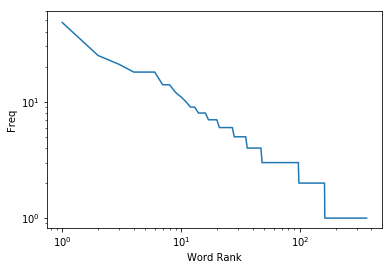

In [18]:
# Plotting frequencies of words
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

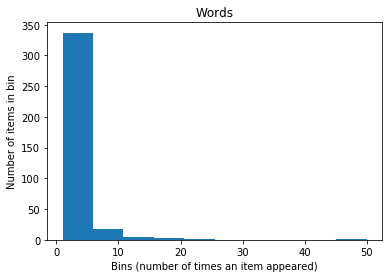

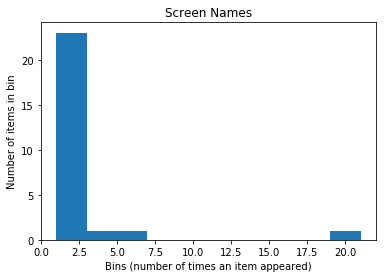

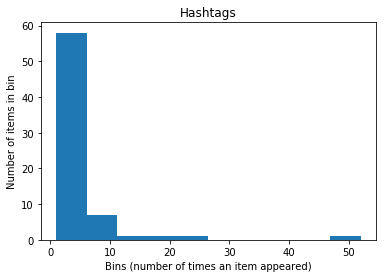

In [19]:
# Generating histograms of words, screen names, and hashtags
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.show()

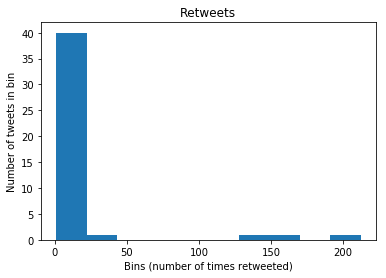

In [20]:
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')



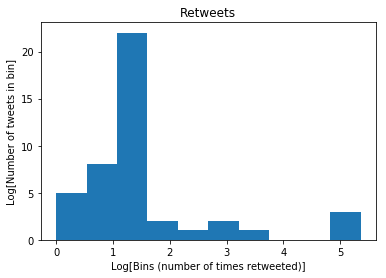

In [21]:
counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well

plt.hist(np.log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')
